In [25]:
import numpy as np
import pandas as pd
import mlrose_hiive
import matplotlib.pyplot as plt
import time as tm


In [26]:
edges = []
n = 15
np.random.seed(7)
for i in range(n):
    first_number = np.random.randint(0, n)
    second_number = np.random.randint(0, n)
    edge=(first_number, second_number)
    if(first_number != second_number):
        if edge not in edges:
            edges.append(edge)
print(edges)
    

[(4, 9), (6, 3), (3, 7), (7, 12), (9, 14), (7, 8), (8, 7), (6, 4), (0, 7), (12, 0), (11, 7), (10, 6), (3, 12)]


In [35]:
random_state = 7
fitness = mlrose_hiive.MaxKColor(edges)
# starting at 15 since there are 12 edges so we need more than that 
problem_length_array = range(5, 100, 20)

rhc_stats_1 = []
sa_stats_1 = []
ga_stats_1  = []
mimic_stats_1 = []
max_attempts_1 = 100
max_iters = 100
for problem_length in problem_length_array:
    for i in range(n):
        first_number = np.random.randint(0, n)
        second_number = np.random.randint(0, n)
        edge=(first_number, second_number)
        if(first_number != second_number):
            if edge not in edges:
                edges.append(edge)
    
    fitness = mlrose_hiive.MaxKColor(edges)       
    
    ## Random Hill Climb
    problem = mlrose_hiive.DiscreteOpt(length=len(edges), fitness_fn=fitness, maximize=True)
   
    start_time = tm.time()
    rhc_best_state, rhc_best_fitness,_ = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    rhc_time = end_time - start_time
    rhc_stats_1.append((problem_length,rhc_best_fitness,rhc_time))
    
    # Simulated Annealing
    # Define decay schedule
    schedule = mlrose_hiive.ExpDecay()
    start_time = tm.time()
    sa_best_state, sa_best_fitness,_  = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    sa_time = end_time - start_time
    sa_stats_1.append((problem_length,sa_best_fitness,sa_time))
    
    # Genetic Algorithm
    start_time = tm.time()
    ga_best_state, ga_best_fitness,_ = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    ga_time = end_time - start_time
    ga_stats_1.append((problem_length,ga_best_fitness,ga_time))
    
    #MIMIC
    start_time = tm.time()
    mimic_best_state, mimic_best_fitness,_ = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.25, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                               curve=False, random_state=random_state)
    end_time = tm.time()
    mimic_time = end_time - start_time
    mimic_stats_1.append((problem_length,mimic_best_fitness,mimic_time))
    

In [36]:
rhc_stats_1 = np.array(rhc_stats_1)
sa_stats_1 = np.array(sa_stats_1)
ga_stats_1 = np.array(ga_stats_1)
mimic_stats_1 = np.array(mimic_stats_1)

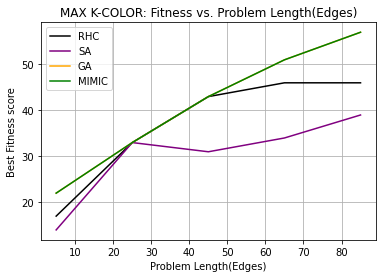

In [43]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[1]],  label='RHC', color='black')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[1]],  label='SA', color='purple')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[1]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[1]],  label='MIMIC', color='green')
plt.title('MAX K-COLOR: Fitness vs. Problem Length(Edges)')
plt.xlabel('Problem Length(Edges)')
plt.ylabel("Best Fitness score")
plt.legend(loc="best")
plt.grid()
plt.show()

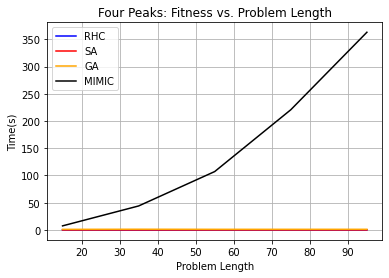

In [33]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[2]],  label='RHC', color='blue')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[2]],  label='SA', color='red')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[2]],  label='MIMIC', color='black')
plt.title('MAX K-COLOR: Time vs. Problem Length')
plt.xlabel('Problem Length(Edges)')
plt.ylabel("Time(s)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [46]:
print(rhc_stats_1[:,[2]])

[[0.00380635]
 [0.00211477]
 [0.00255609]
 [0.00279188]
 [0.00277996]]


In [47]:
print(sa_stats_1[:,[2]])

[[0.00566506]
 [0.00364089]
 [0.00421119]
 [0.0048008 ]
 [0.00544691]]


In [48]:
print(ga_stats_1[:,[2]])

[[1.49374175]
 [1.16664886]
 [1.2165091 ]
 [1.27790403]
 [1.29797411]]


In [49]:
print(mimic_stats_1[:,[2]])

[[ 20.32736301]
 [ 45.75097013]
 [ 71.89045501]
 [108.96999502]
 [145.79152608]]


# Modifying the Iterations

In [39]:
random_state = 7
fitness = mlrose_hiive.MaxKColor(edges)
max_iters_array = range(15, 200, 20)
rhc_stats = []
sa_stats = []
ga_stats  = []
mimic_stats = []
max_attempts = 1000
max_iters = 100
problem_length = 50

for max_iters in max_iters_array:
    ## Random Hill Climb
    
    problem = mlrose_hiive.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True)
   
    start_time = tm.time()
    rhc_best_state, rhc_best_fitness,_ = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    rhc_time = end_time - start_time
    rhc_stats.append((max_iters,rhc_best_fitness,rhc_time))
    
    # Simulated Annealing
    # Define decay schedule
    schedule = mlrose_hiive.ExpDecay()
    start_time = tm.time()
    sa_best_state, sa_best_fitness,_  = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    sa_time = end_time - start_time
    sa_stats.append((max_iters,sa_best_fitness,sa_time))
    
    # Genetic Algorithm
    start_time = tm.time()
    ga_best_state, ga_best_fitness,_ = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.5, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    ga_time = end_time - start_time
    ga_stats.append((max_iters,ga_best_fitness,ga_time))
    
    # MIMIC
    start_time = tm.time()
    mimic_best_state, mimic_best_fitness,_ = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.1, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    mimic_time = end_time - start_time
    mimic_stats.append((max_iters,mimic_best_fitness,mimic_time))

In [41]:
rhc_stats = np.array(rhc_stats)
sa_stats = np.array(sa_stats)
ga_stats = np.array(ga_stats)
mimic_stats = np.array(mimic_stats)


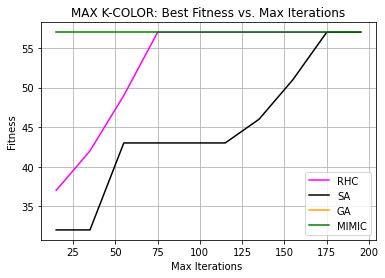

In [44]:
plt.figure()
plt.plot( rhc_stats[:,[0]], rhc_stats[:,[1]],  label='RHC', color='magenta')
plt.plot(sa_stats[:,[0]], sa_stats[:,[1]],  label='SA', color='black')
plt.plot( ga_stats[:,[1]], ga_stats[:,[1]],  label='GA', color='orange')
plt.plot(mimic_stats[:,[0]], mimic_stats[:,[1]],  label='MIMIC', color='green')
plt.title('MAX K-COLOR: Best Fitness vs. Max Iterations')
plt.xlabel('Max Iterations ')
plt.ylabel("Fitness")
plt.legend(loc="best")
plt.grid()
plt.show()

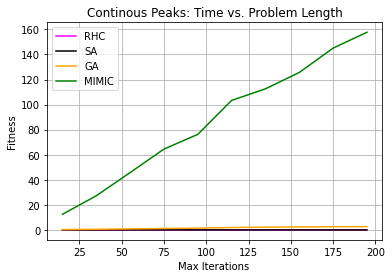

In [45]:
plt.figure()
plt.plot( rhc_stats[:,[0]], rhc_stats[:,[2]],  label='RHC', color='magenta')
plt.plot(sa_stats[:,[0]], sa_stats[:,[2]],  label='SA', color='black')
plt.plot( ga_stats[:,[0]], ga_stats[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats[:,[0]], mimic_stats[:,[2]],  label='MIMIC', color='green')
plt.title('Continous Peaks: Time vs. Problem Length')
plt.xlabel('Max Iterations ')
plt.ylabel("Fitness")
plt.legend(loc="best")
plt.grid()
plt.show()

In [52]:
print(rhc_stats[:,[2]])


[[0.00076127]
 [0.00124288]
 [0.00181699]
 [0.00258493]
 [0.00285411]
 [0.00434875]
 [0.003901  ]
 [0.00462127]
 [0.0051291 ]
 [0.00568008]]


In [54]:
print(sa_stats[:,[2]])

[[0.00111723]
 [0.00250292]
 [0.00277209]
 [0.00413275]
 [0.00634313]
 [0.00763583]
 [0.0078783 ]
 [0.0100019 ]
 [0.00964785]
 [0.01010466]]


In [55]:
print(ga_stats[:,[2]])

[[0.25260592]
 [0.52062201]
 [0.80184007]
 [1.12521887]
 [1.39354181]
 [1.93034792]
 [2.22102284]
 [2.381145  ]
 [2.53757715]
 [2.62029481]]


In [56]:
print(mimic_stats[:,[2]])

[[ 12.49383092]
 [ 27.30465269]
 [ 45.80001926]
 [ 64.53351092]
 [ 76.26400304]
 [103.34485888]
 [112.5681529 ]
 [125.64239907]
 [145.0522511 ]
 [157.72163033]]


# Parameter Tuning 

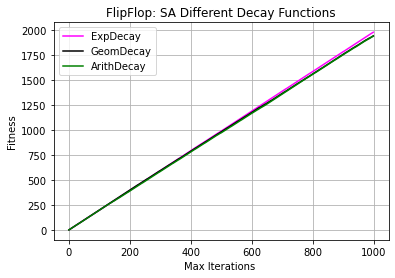

In [14]:
fitness = mlrose_hiive.MaxKColor(edges)
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
random_state = 7
schedule = mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=5)
sa_best_state, sa_best_fitness_exp,sa_best_fitness_curve_exp  = mlrose_hiive.simulated_annealing(
                                                                    problem, schedule = schedule,
                                                                    max_attempts = 100, max_iters = 1000,
                                                                    curve=True, random_state = random_state)

schedule=mlrose_hiive.GeomDecay(init_temp=20, decay=0.99 , min_temp=1)
sa_best_state, sa_best_fitness_geom,sa_best_fitness_curve_geom  = mlrose_hiive.simulated_annealing(
                                                                        problem, schedule = schedule,
                                                                        max_attempts = 100, max_iters = 1000,
                                                                        curve=True, random_state = random_state)

schedule=mlrose_hiive.ArithDecay(init_temp=20, decay=0.99, min_temp=1)
sa_best_state, sa_best_fitness_arith,sa_best_fitness_curve_arith  = mlrose_hiive.simulated_annealing(
                                                                        problem, schedule = schedule,
                                                                        max_attempts = 100, max_iters = 1000,
                                                                        curve=True, random_state = random_state)

plt.figure()
plt.plot( sa_best_fitness_curve_exp[:,[1]],  label='ExpDecay', color='magenta')
plt.plot(sa_best_fitness_curve_geom[:,[1]],  label='GeomDecay', color='black')
plt.plot(sa_best_fitness_curve_arith[:,[1]] ,  label='ArithDecay', color='green')
plt.title('FlipFlop: SA Different Decay Functions')
plt.xlabel('Max Iterations ')
plt.ylabel("Fitness")
plt.legend(loc="best")
plt.grid()
plt.show()

In [16]:
# RHC
# changing the restart parameter
random_state = 7
fitness = mlrose_hiive.MaxKColor(edges)
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_0 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 0,  random_state = random_state)

rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_4 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 4,  random_state = random_state)


rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_8 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 8,  random_state = random_state)
rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_32 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 32,  random_state = random_state)

In [22]:
random_state = 7
fitness = mlrose_hiive.MaxKColor(edges)
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
time_diff = [0,0,0]
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_5,ga_best_fitness_curve_50 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=50, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=True, random_state=random_state)
end_time = tm.time()
time_diff[0] = end_time - start_time

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_200,ga_best_fitness_curve_200 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=200, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=True, random_state=random_state)
end_time = tm.time()
time_diff[1] = end_time - start_time

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_500,ga_best_fitness_curve_500 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=500, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                               curve=True, random_state=random_state)
end_time = tm.time()
time_diff[2] = end_time - start_time

In [23]:
print(ga_best_fitness_2_5)
print(ga_best_fitness_2_200)
print(ga_best_fitness_2_500)
print(time_diff)

12.0
12.0
12.0
[0.2845339775085449, 1.0899760723114014, 2.985524892807007]


12.0
